# 실습1. 마켓과 머신러닝

- 마켓에 들어온 생선의 크기 정보를 입력하면 자동으로 생선 이름 알려주기

- 도미에 대한 정보 안다면? "30~40cm 길이의 생선은 도미"

- 시스템이 스스로 기준을 찾으려면?

### 도미 데이터 준비하기

In [21]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0,
                500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
                610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0,
                714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

len(bream_length)

35

- 도미의 길이, 무게는 도미의 특징을 나타내는 특성(feature) 라고 함
    - 통계학에서는 변수라고 부름


    
- 특성은 데이터를 표현하는 하나의 성질

### 도미 길이와 무게 데이터에 대한 산점도

In [8]:
import matplotlib.pyplot as plt

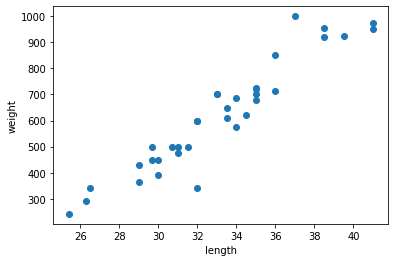

In [9]:
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 생선의 길이가 길수록 무게가 많이 나가는 모양 -> 선형적 관계

### 빙어 데이터 준비하기

In [20]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2,
                13.4, 12.2, 19.7, 19.9]

len(smelt_length)

14

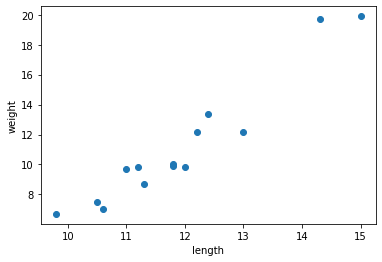

In [75]:
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 도미 데이터와 빙어 데이터 병합한 산점도

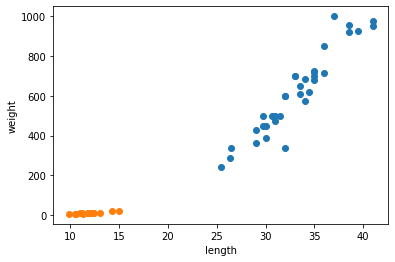

In [15]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 첫 번째 머신러닝 프로그램

### 두 생선 데이터 병합

In [59]:
#두 리시트 합치기
lenght = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [60]:
# 2차원 리스트로 변환
fish_data = [[l,w] for l, w in zip(lenght, weight)]
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

### 타겟(레이블) 데이터 생성

In [61]:
fish_target = [1]*35 + [0]*14

print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## K-최근접 이웃(K-Nearest Neighbor) 알고리즘을 이용한 분류

### K-최근접 이웃(K-Nearest Neighbor) 알고리즘 소개

- 테스트 데이터와 K개 훈련데이터의 y값들을 비교
- 분류와 회귀 모두 활용
    - 분류 : k개 최근접 이웃들의 class들 중 다수결 결과로 class 예측
    - 회귀 : k개 최근접 이웃들이 가지고 있는 값의 평균을 결과값으로 예측

- 비모수방식이며 instance-based 알고리즘

- train과 test 세트로 데이터를 분리하지만 실제로 train은 존재하지 않는 게으른 알고리즘

- 구체적인 데이터를 가지고 예측을 요청할 때, K개 가장 가까운 사례를 train data set에서 찾아 해당하는 데이터의 y 값을 기반으로 예측 결과를 제시

- K 값 : 동점을 막기 위해 대개 홀수로 정함 
    - k가 작으면 이상치 등 노이즈에 민감하게 반응하여 과대적합 
        - k=1인 경우 가장 가까운 이웃과 같은 클래스가 할당됨
    - k가 크면 자료의 패턴을 파악할 수 없어 과소적합
        - k=N인 경우 전체 평균의 개념


- '가깝다'는 판단 기준 : **거리** (맨하탄 거리, 유클리디안 거리, 민코위스키 거리 등)

### 사이킷런의 K-최근접이웃 클래스

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
# KNeighborsClass 객체 생성

kn = KNeighborsClassifier()

In [64]:
# 훈련(training) : fit(features, label) 메서드

kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [65]:
# 모델 평가 : score() 메서드 => 정확도

kn.score(fish_data, fish_target)

1.0

**정확도(accuracy)**

- 정확한 답을 몇개 맞추었는지를 백분율로 나타낸 값
-  $정확히 맞힌 개수 / 전체 데이터수$

### K-최근접 이웃 알고리즘을 이용한 새로운 데이터 분류

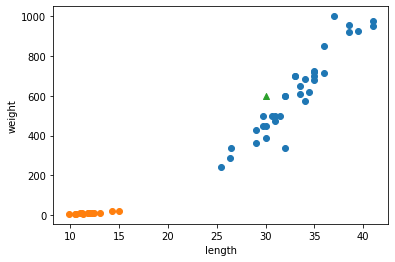

In [66]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [67]:
kn.predict([[30,600],[50,550],[5,20]])

array([1, 1, 0])

In [70]:
# _fit_X  속성 : fish_data를 가지고 있음
    
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [71]:
# _y 속성 : fish_target 을 가지고 있음

print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [72]:
# K-neighbors 크기 지정

kn49 = KNeighborsClassifier(n_neighbors=49)

In [74]:
# K=49인 경우 모델 훈련 및 성능

kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [77]:
# **49개 중 도미가 35개 이므로 어떤 데이터를 넣어도 무조건 도미로 예측**

print(35/49)

0.7142857142857143


### 확인 문제

In [78]:
kn = KNeighborsClassifier()

kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [79]:
for k in range(5, 50):
    # 최근접 이웃 개수 설정
    kn.n_neighbors = k
    # 점수 계산
    score = kn.score(fish_data, fish_target)
    # print('k= %d, score= %f' %(k, score))
    # 100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1 :
        print(k, score)
        break

18 0.9795918367346939


<!-- # ### [마무리]
# 
# - 특성
# - k-최근접 이웃 알고리즘
# - 정확도
# 
# ### 핵심 패키지와 함수
# **scikit-learn**
# 
# - KNeighborsClassifier()
# - fit()
# - predict()
# - score() -->

### [마무리]

- 특성
- k-최근접 이웃 알고리즘
- 정확도

### 핵심 패키지와 함수
**scikit-learn**

- KNeighborsClassifier()
- fit()
- predict()
- score()